EN2550 - Fundementals of Image Processing and Machine Vision [Assignment 1 Intensity Transformation and Neighbourhood filtering]

Name : R.G.S.M. RANATUNGA

Index No. : 190504H

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Question 1

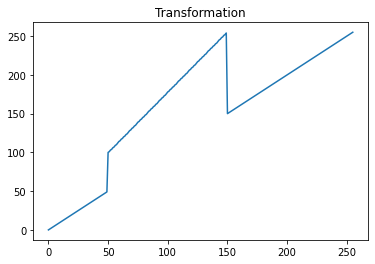

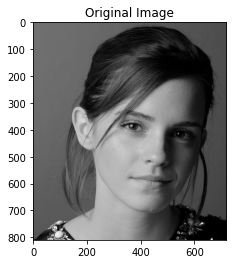

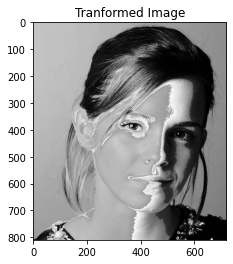

In [12]:
img_orig = cv.imread(r'./emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

# Generating the transformation
t = np.arange(0,256,dtype=np.uint8)
t[:50] = np.linspace(0,50,50,endpoint=False)
t[50:150] = np.linspace(100,256,100,endpoint=False)
t[150:] = np.linspace(150,256,106,endpoint=False)

fig,ax = plt.subplots()
ax.plot(t)
plt.title("Transformation")

img_t = cv.LUT(img_orig,t)

fig,ax = plt.subplots()
ax.imshow(cv.cvtColor(img_orig, cv.COLOR_GRAY2RGB))
plt.title("Original Image")
plt.show()

fig,ax = plt.subplots()
ax.imshow(cv.cvtColor(img_t, cv.COLOR_GRAY2RGB))
plt.title("Tranformed Image")
plt.show()

Question 2

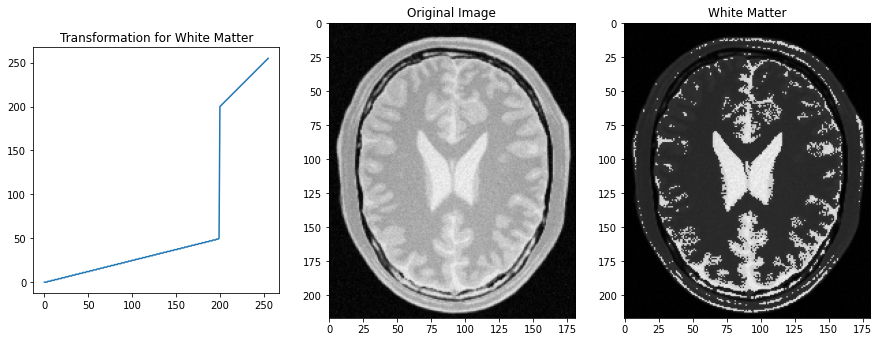

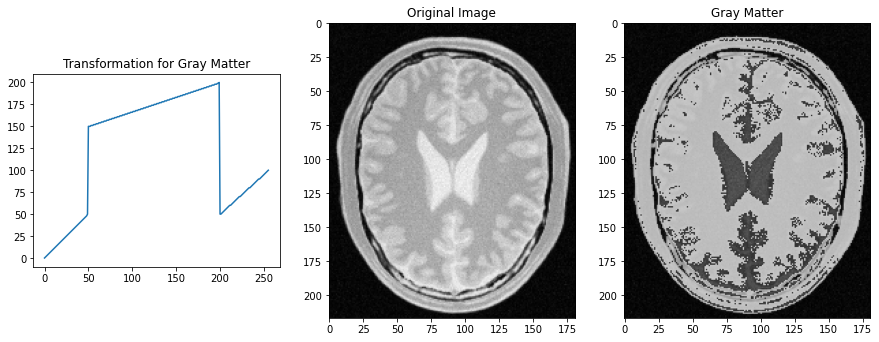

In [11]:
img_orig = cv.imread(r'./brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

### Part a - White Matter ###

# Transformation for white matter
tw = np.arange(0,256,dtype=np.uint8)
tw[:200]=np.linspace(0,50,200)
tw[200:256]=np.linspace(200,255,56)
img_t = cv.LUT(img_orig,tw)

fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].plot(tw)
ax[0].set_aspect('equal')
ax[0].set_title("Transformation for White Matter")

ax[1].imshow(cv.cvtColor(img_orig, cv.COLOR_GRAY2RGB))
ax[1].set_title("Original Image")

ax[2].imshow(cv.cvtColor(img_t, cv.COLOR_GRAY2RGB))
ax[2].set_title("White Matter")
plt.show()

### Part b - Gray Matter ###

# Transformation for gray matter
tg = np.arange(0,256,dtype=np.uint8)
tg[:50]=np.linspace(0,50,50)
tg[50:200]=np.linspace(150,200,150)
tg[200:]=np.linspace(50,100,56)
img_t = cv.LUT(img_orig,tg)

fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].plot(tg)
ax[0].set_aspect('equal')
ax[0].set_title("Transformation for Gray Matter")

ax[1].imshow(cv.cvtColor(img_orig, cv.COLOR_GRAY2RGB))
ax[1].set_title("Original Image")

ax[2].imshow(cv.cvtColor(img_t, cv.COLOR_GRAY2RGB))
ax[2].set_title("Gray Matter")
plt.show()

Question 3

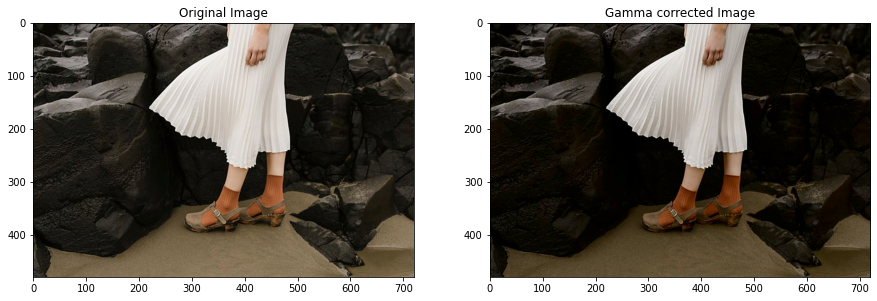

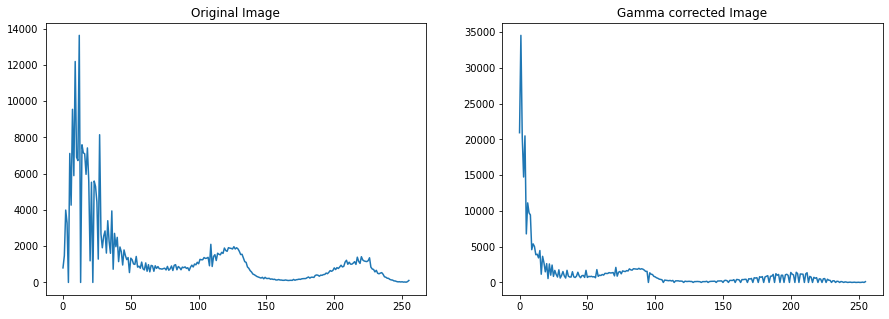

In [9]:
### Part a ###

f = cv.imread(r'./highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert f is not None

# Convert to L*a*b* color space
f = cv.cvtColor(f, cv.COLOR_BGR2Lab)

# Applying gamma correction
gamma = 1.5
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8') 
# Applying Gamma correction to the L field only
L = cv.LUT(f[:,:,0],table).reshape(480,720,1) 

f_gamma = np.concatenate([L,f[:,:,1:]],-1) 

fig,ax = plt.subplots(1,2,figsize = (15,5))
ax[0].imshow(cv.cvtColor(f, cv.COLOR_Lab2RGB))
ax[0].set_title("Original Image")

ax[1].imshow(cv.cvtColor(f_gamma, cv.COLOR_Lab2RGB))
ax[1].set_title("Gamma corrected Image")
plt.show()

### Part b ###

hist_f = cv.calcHist([f],[0], None,[256],[0,256]) # Original Histogram
hist_f_gamma = cv.calcHist([f_gamma],[0], None,[256],[0,256]) # Corrected Histogram

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("Original Image")
ax[0].plot(hist_f)
ax[1].set_title("Gamma corrected Image")
ax[1].plot(hist_f_gamma)
plt.show()


Question 4

In [3]:
def hist_eq(img):
    hist =  cv.calcHist([img],[0],None,[256],[0,256])
    cdf_hist =hist.cumsum()
    y = np.uint8(255 * (cdf_hist-np.min(cdf_hist))/(np.max(cdf_hist)-np.min(cdf_hist)))
    a, b = img.shape
    x = np.zeros_like(img)
    for i in range(0, a):
	    for j in range(0, b):
		    x[i, j] = y[img[i, j]]
    return x 

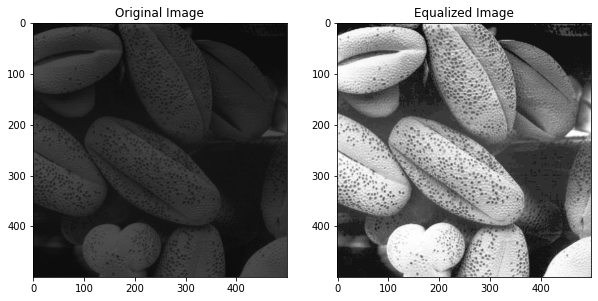

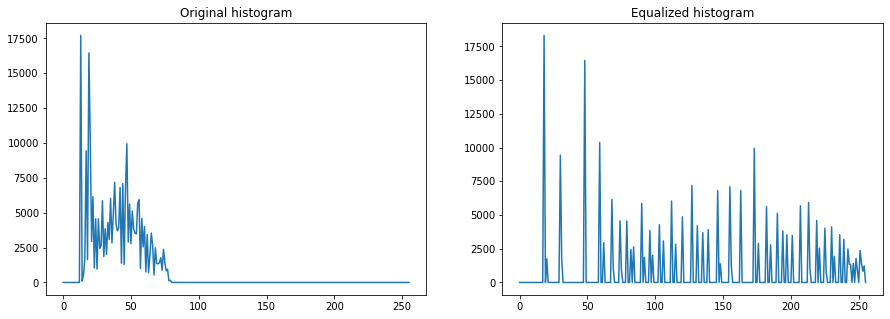

In [4]:
img_o = cv.imread(r'./shells.png', cv.IMREAD_GRAYSCALE)
assert img_o is not None

hist_o = cv.calcHist([img_o],[0],None,[256],[0,256])
img_eq = hist_eq(img_o) 
hist_e=  cv.calcHist([img_eq],[0],None,[256],[0,256])

fig,ax = plt.subplots(1,2,figsize = (10,10))

o = cv.cvtColor(img_o, cv.COLOR_BGR2RGB)
ax[0].imshow(o)
ax[0].set_title("Original Image")

e = cv.cvtColor(img_eq, cv.COLOR_BGR2RGB)
ax[1].imshow(e)
ax[1].set_title("Equalized Image")

fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(hist_o)
ax[0].set_title("Original histogram")
ax[1].plot(hist_e)
ax[1].set_title("Equalized histogram")

plt.show()
